# Comparing datasets to arrive at parameters for caiman

### Lets import some packages

In [1]:
from decode_lab_code.preprocessing.ophys.caiman_wrapper import caiman_preprocess
import matplotlib.pyplot as plt
from caiman.source_extraction import cnmf

### Lets load in the example dataset and Trevors data

In [2]:
# example dataset
folder_name = '/Users/js0403/caiman_data/example_movies'
fname_neuron = 'data_endoscope.tif'
frame_rate = 10
cp_ex = caiman_preprocess(folder_name,fname_neuron,frame_rate,activate_cluster=False)

# trevors
folder_name = '/Users/js0403/ophysdata/Trevor_750K2_200ms_RedGreen_depolar002'
fname_neuron = 'rec_neuron.tif'
frame_rat = 10
cp_tr = caiman_preprocess(folder_name,fname_neuron,frame_rate,activate_cluster=True)

Loading movie


100%|██████████| 1/1 [00:00<00:00,  6.58it/s]


Loading movie


100%|██████████| 1/1 [00:00<00:00,  7.07it/s]


cluster set-up


### Play some movies!

In [3]:
# The caiman_preprocess object has attributes .watch_movie to quickly view the video
cp_ex.watch_movie()
cp_tr.watch_movie()

### Notice that the patch_size is massive in the example dataset, but tiny in our dataset. Lets get a ratio'd estimate

#pixels per patch for trevor:  10.666666666666666
#pixels per patch for example:  2.6666666666666665
192


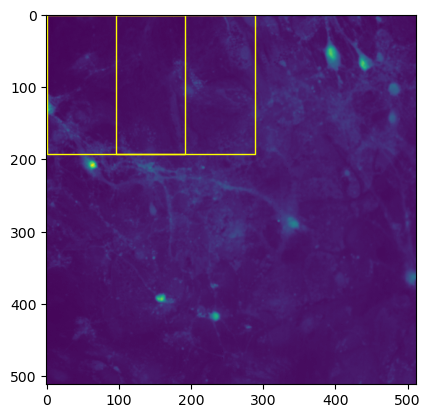

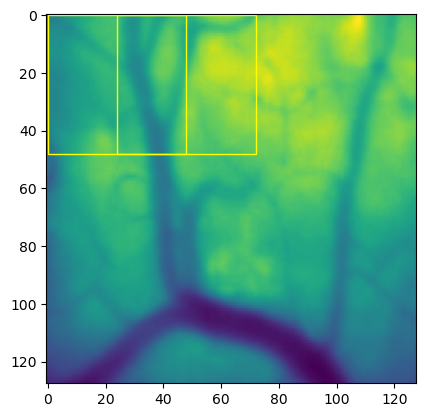

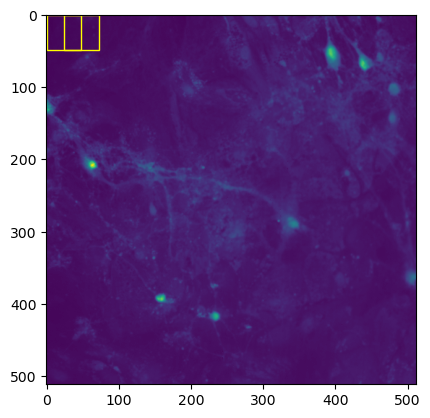

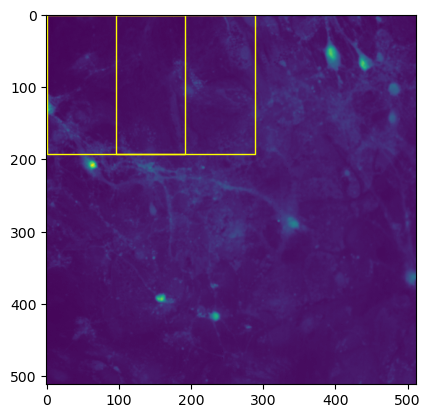

In [4]:
patch_size=48; patch_overlap=patch_size/2
cp_ex.test_patch_size(patch_size,patch_overlap)
cp_tr.test_patch_size(patch_size,patch_overlap)

# get ratio of total patch size
frames_ex = cp_ex.get_frames()
frames_tr = cp_tr.get_frames()

# get shape of camera from one time point
shape_tr = frames_tr[0,:,:].shape
shape_ex = frames_ex[0,:,:].shape

ratio_tr = shape_tr[0]/patch_size
ratio_ex = shape_ex[0]/patch_size

print("#pixels per patch for trevor: ",ratio_tr)
print("#pixels per patch for example: ",ratio_ex)

# number of pixeles / #pixels/frame in example
patch_size = int(shape_tr[0]/ratio_ex); patch_overlap = patch_size/2
print(patch_size)

# update figure
cp_tr.test_patch_size(patch_size,patch_overlap)

### Estimate parameters

In [5]:
cp_tr.get_params(motion_correct=False, patch_size=patch_size,neurons_per_patch=5,calcium_transient_decay=1)

Not motion correcting...
Decode mmap filename /Users/js0403/ophysdata/Trevor_750K2_200ms_RedGreen_depolar002/memmap_d1_512_d2_512_d3_1_order_C_frames_514.mmap
Estimating minimum correlation and peak-to-noise...


CNMFParams:

data:

{'caiman_version': '1.9.15',
 'decay_time': 1,
 'dims': (512, 512),
 'dxy': (1, 1),
 'fnames': ['/Users/js0403/ophysdata/Trevor_750K2_200ms_RedGreen_depolar002/rec_neuron.tif'],
 'fr': 10,
 'last_commit': 'GITW-a8ddd5fd20850eb9e070113b09066a4065df4a45',
 'mmap_C': None,
 'mmap_F': None,
 'var_name_hdf5': 'mov'}

spatial_params:

{'block_size_spat': 5000,
 'dist': 3,
 'expandCore': array([[0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0]]),
 'extract_cc': True,
 'maxthr': 0.1,
 'medw': None,
 'method_exp': 'dilate',
 'method_ls': 'lasso_lars',
 'n_pixels_per_process': None,
 'nb': 0,
 'normalize_yyt_one': True,
 'nrgthr': 0.9999,
 'num_blocks_per_run_spat': 20,
 'se': None,
 'ss': None,
 'thr_method': 'nrg',
 'update_background_components': True}

temporal_params:

{'ITER': 2,
 'bas_nonneg': False,
 'block_size_temp': 5000,
 'fudge_factor': 0.96,
 'lags': 5,
 'memory_efficient': False,
 'method_deconvoluti

In [8]:
cp_tr.opts

CNMFParams:

data:

{'caiman_version': '1.9.15',
 'decay_time': 1,
 'dims': (512, 512),
 'dxy': (1, 1),
 'fnames': ['/Users/js0403/ophysdata/Trevor_750K2_200ms_RedGreen_depolar002/rec_neuron.tif'],
 'fr': 10,
 'last_commit': 'GITW-a8ddd5fd20850eb9e070113b09066a4065df4a45',
 'mmap_C': None,
 'mmap_F': None,
 'var_name_hdf5': 'mov'}

spatial_params:

{'block_size_spat': 5000,
 'dist': 3,
 'expandCore': array([[0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0]]),
 'extract_cc': True,
 'maxthr': 0.1,
 'medw': None,
 'method_exp': 'dilate',
 'method_ls': 'lasso_lars',
 'n_pixels_per_process': None,
 'nb': 0,
 'normalize_yyt_one': True,
 'nrgthr': 0.9999,
 'num_blocks_per_run_spat': 20,
 'se': None,
 'ss': None,
 'thr_method': 'nrg',
 'update_background_components': True}

temporal_params:

{'ITER': 2,
 'bas_nonneg': False,
 'block_size_temp': 5000,
 'fudge_factor': 0.96,
 'lags': 5,
 'memory_efficient': False,
 'method_deconvoluti

In [10]:
cnm = cnmf.CNMF(n_processes=cp_tr.n_processes, dview=cp_tr.dview, Ain=cp_tr.opts["Ain"], params=opts)
cnm.fit(images)

TypeError: 'NoneType' object is not callable